In [12]:
# Imports
import numpy as np
import os
from typing import List
import matplotlib.pyplot as plt
import re

# # Function to clean tokens
# def clean_tokens(tokens: List[str]) -> List[str]:
#     tokens = [t.replace(" ", "") for t in tokens]
#     return tokens

def clean_tokens(tokens: List[str]) -> List[str]:
    # Use regular expressions to remove special characters and punctuation
    cleaned_tokens = [re.sub(r'[^\w\s]', '', t) for t in tokens]
    print("cleaned_tokens 1: ",cleaned_tokens)
    # Remove empty tokens that may result from the cleaning process
    cleaned_tokens = [t for t in cleaned_tokens if t]
    print("cleaned token 2 :", cleaned_tokens)
    return cleaned_tokens


# Function to load file content
def load_file(file: str) -> str:
    with open(file) as f:
        return f.read()

# Function to get tokens from a string
def tokens_for_string(s: str) -> List[str]:
    print("input : ",s.split())
    return clean_tokens(s.split())


selected_example_text = "/content/data.txt"  # Change this to select different text
source_text = load_file(selected_example_text)

# Generate tokens
tokens = tokens_for_string(source_text)

# Display the first 10 tokens
print("First 50 tokens:", tokens[:50])


input :  ['This', 'is', 'a', 'dummy', 'text', 'file.', 'It', 'contains', 'some', 'sample', 'text', 'that', 'will', 'be', 'used', 'for', 'testing', 'the', 'code.', 'We', 'can', 'add', 'more', 'sentences', 'to', 'make', 'it', 'longer', 'and', 'more', 'interesting.', 'The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog.']
cleaned_tokens 1:  ['This', 'is', 'a', 'dummy', 'text', 'file', 'It', 'contains', 'some', 'sample', 'text', 'that', 'will', 'be', 'used', 'for', 'testing', 'the', 'code', 'We', 'can', 'add', 'more', 'sentences', 'to', 'make', 'it', 'longer', 'and', 'more', 'interesting', 'The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
cleaned token 2 : ['This', 'is', 'a', 'dummy', 'text', 'file', 'It', 'contains', 'some', 'sample', 'text', 'that', 'will', 'be', 'used', 'for', 'testing', 'the', 'code', 'We', 'can', 'add', 'more', 'sentences', 'to', 'make', 'it', 'longer', 'and', 'more', 'interesting', 'The', 'quick', 'brown', 'fox', 'jumps', 'over', 

In [13]:
# Function to calculate the transition matrix
def calculate_transition_matrix(tokens: List[str]) -> np.ndarray:
    unique_tokens = list(set(tokens))
    print("unique_tokens : ",unique_tokens)
    unique_word_combination_counts = {}
    print("unique_word_combination_counts : ",unique_word_combination_counts)
    total_froms = {}

    transition_matrix = np.zeros((len(unique_tokens), len(unique_tokens)))
    print("transition_matrix : ",transition_matrix)

    for i, token in enumerate(tokens):
        if i < len(tokens) - 1:
            from_to = (token, tokens[i + 1])
            print("from_to : ",from_to)
            unique_word_combination_counts[from_to] = unique_word_combination_counts.get(from_to, 0) + 1
            print("unique_word_combination_counts : ",unique_word_combination_counts)
            total_froms[token] = total_froms.get(token, 0) + 1
            print("total_froms : ",total_froms)
    print("loop 2: ")
    for key, value in unique_word_combination_counts.items():
        print("key : ",key)
        print("value : ",value)
        _from, _to = key
        print("_from : ",_from)
        print("_to : ",_to)
        transition_matrix[unique_tokens.index(_from), unique_tokens.index(_to)] = value / total_froms[_from]
        print("transition_matrix : ",transition_matrix)

    return transition_matrix

# Calculate transition matrix
P_matrix = calculate_transition_matrix(tokens)

# Display the transition matrix
print("Transition Matrix shape:", P_matrix.shape)
print("Transition Matrix (first 10 rows):")
print(P_matrix[:10])


unique_tokens :  ['more', 'longer', 'code', 'text', 'dummy', 'that', 'testing', 'interesting', 'brown', 'We', 'be', 'dog', 'can', 'The', 'is', 'contains', 'used', 'for', 'some', 'a', 'It', 'jumps', 'file', 'and', 'to', 'the', 'This', 'fox', 'will', 'sentences', 'add', 'lazy', 'sample', 'over', 'quick', 'it', 'make']
unique_word_combination_counts :  {}
transition_matrix :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
from_to :  ('This', 'is')
unique_word_combination_counts :  {('This', 'is'): 1}
total_froms :  {'This': 1}
from_to :  ('is', 'a')
unique_word_combination_counts :  {('This', 'is'): 1, ('is', 'a'): 1}
total_froms :  {'This': 1, 'is': 1}
from_to :  ('a', 'dummy')
unique_word_combination_counts :  {('This', 'is'): 1, ('is', 'a'): 1, ('a', 'dummy'): 1}
total_froms :  {'This': 1, 'is': 1, 'a': 1}
from_to :  ('dummy', 'text')
unique_word_combination_counts :  {('This', 

In [14]:
# Function to generate text
def generate_text(tokens: List[str], length: int, P_matrix: np.ndarray, P_init: np.ndarray=None) -> str:
    # Create a list of unique tokens from the input tokens
    unique_tokens = list(set(tokens))

    # Initialize an empty list to store the generated text
    text = []

    # If initial probability distribution is provided, use it to select the first token
    if P_init is not None:
        current_token = np.random.choice(unique_tokens, p=P_init)
    else:
        # Otherwise, randomly select the first token from unique tokens
        current_token = np.random.choice(unique_tokens)

    # Append the first token to the text list
    text.append(current_token)

    # Generate the remaining tokens for the desired length
    for _ in range(length):
        # Ensure the current token is not the last token in the input tokens
        while current_token == tokens[-1]:
            current_token = np.random.choice(unique_tokens)

        # Select the next token based on the transition probabilities of the current token
        current_token = np.random.choice(unique_tokens, p=P_matrix[unique_tokens.index(current_token)])

        # Append the selected token to the text list
        text.append(current_token)

    # Return the generated text as a single string with spaces in between tokens
    return " ".join(text)

# Initialize word (optional)
initial_word = ""  # Change this to set the initial word
length = 100 # Length of the generated text

P_init = None
if initial_word:
    unique_tokens = list(set(tokens))
    print("unique_tokens:", unique_tokens)
    start_token = initial_word.split()[-1]
    print("start_token:", start_token)
    if start_token in unique_tokens:
        P_init = np.zeros(len(unique_tokens))
        P_init[unique_tokens.index(start_token)] = 1

# Generate text
generated_text = generate_text(tokens, length, P_matrix, P_init)

# Display the generated text
print("Generated text:")
print(generated_text)


Generated text:
testing the lazy dog some sample text that will be used for testing the code We can add more interesting The quick brown fox jumps over the lazy dog some sample text that will be used for testing the code We can add more sentences to make it longer and more interesting The quick brown fox jumps over the code We can add more sentences to make it longer and more interesting The quick brown fox jumps over the code We can add more interesting The quick brown fox jumps over the code We can add more sentences to make it


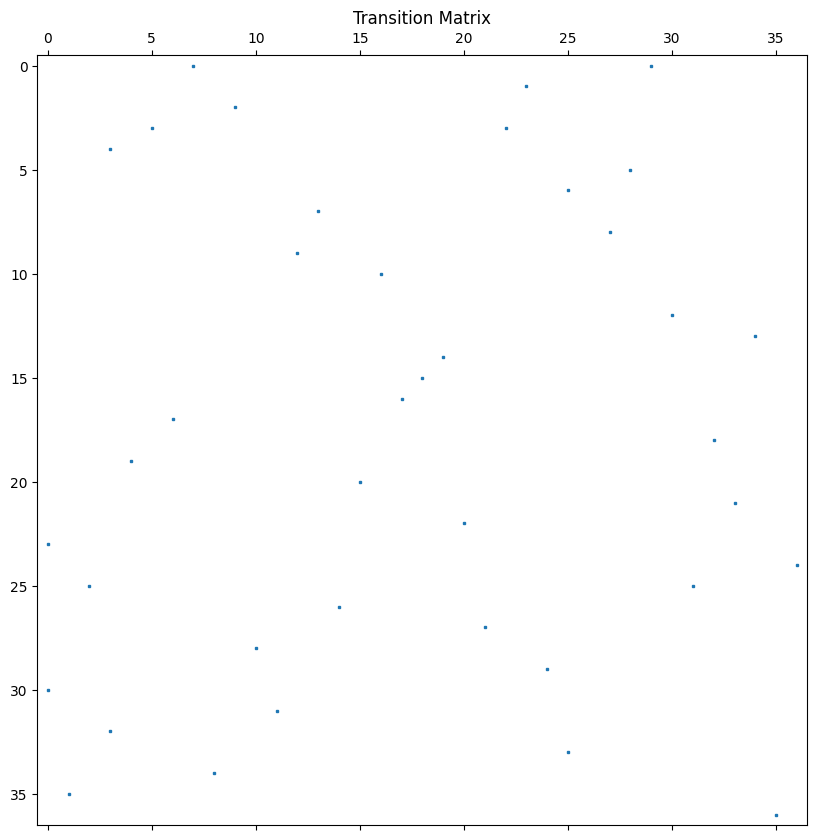

In [15]:
# Function to plot the transition matrix
def plot_transition_matrix(P_matrix: np.ndarray):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.spy(P_matrix, markersize=2)
    plt.title("Transition Matrix")
    plt.show()

# Plot the transition matrix
plot_transition_matrix(P_matrix)


In [16]:
# Create a dummy text file for testing
dummy_text = """This is a dummy text file. It contains some sample text that will be used for testing the code.
We can add more sentences to make it longer and more interesting.
The quick brown fox jumps over the lazy dog."""

with open("/content/data.txt", "w") as f:
    f.write(dummy_text)

In [17]:
# Imports
import numpy as np
import os
from typing import List
import matplotlib.pyplot as plt
import re

# # Function to clean tokens
# def clean_tokens(tokens: List[str]) -> List[str]:
#     tokens = [t.replace(" ", "") for t in tokens]
#     return tokens

def clean_tokens(tokens: List[str]) -> List[str]:
    # Use regular expressions to remove special characters and punctuation
    cleaned_tokens = [re.sub(r'[^\w\s]', '', t) for t in tokens]
    print("cleaned_tokens 1: ",cleaned_tokens)
    # Remove empty tokens that may result from the cleaning process
    cleaned_tokens = [t for t in cleaned_tokens if t]
    print("cleaned token 2 :", cleaned_tokens)
    return cleaned_tokens


# Function to load file content
def load_file(file: str) -> str:
    with open(file) as f:
        return f.read()

# Function to get tokens from a string
def tokens_for_string(s: str) -> List[str]:
    print("input : ",s.split())
    return clean_tokens(s.split())


selected_example_text = "/content/data.txt"  # Change this to select different text
source_text = load_file(selected_example_text)

# Generate tokens
tokens = tokens_for_string(source_text)

# Display the first 50 tokens
print("First 50 tokens:", tokens[:50])

input :  ['This', 'is', 'a', 'dummy', 'text', 'file.', 'It', 'contains', 'some', 'sample', 'text', 'that', 'will', 'be', 'used', 'for', 'testing', 'the', 'code.', 'We', 'can', 'add', 'more', 'sentences', 'to', 'make', 'it', 'longer', 'and', 'more', 'interesting.', 'The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog.']
cleaned_tokens 1:  ['This', 'is', 'a', 'dummy', 'text', 'file', 'It', 'contains', 'some', 'sample', 'text', 'that', 'will', 'be', 'used', 'for', 'testing', 'the', 'code', 'We', 'can', 'add', 'more', 'sentences', 'to', 'make', 'it', 'longer', 'and', 'more', 'interesting', 'The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
cleaned token 2 : ['This', 'is', 'a', 'dummy', 'text', 'file', 'It', 'contains', 'some', 'sample', 'text', 'that', 'will', 'be', 'used', 'for', 'testing', 'the', 'code', 'We', 'can', 'add', 'more', 'sentences', 'to', 'make', 'it', 'longer', 'and', 'more', 'interesting', 'The', 'quick', 'brown', 'fox', 'jumps', 'over', 